### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# change directory to 'master_study/analysis'
os.chdir('master_study/analysis')

# Local imports
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [2]:
# Define study
STUDY_NAME = "tunescan_50cm_2024_with_replicates"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_1600/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(5)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  normalized amplitude in xy-plane  \
beam  qx       qy                                                              
lhcb1 62.31600 60.30625      base_collider                           12.3125   
               60.30650      base_collider                           11.4375   
               60.30675      base_collider                           11.4375   
               60.30700      base_collider                           12.5625   
               60.30725      base_collider                           12.2500   
...                                    ...                               ...   
      62.32975 60.32475      base_collider                            4.0000   
               60.32500      base_collider                            4.0000   
               60.32525      base_collider                            4.0000   
               60.32550      base_collider                            4.0000   
               60.32575      base_collider                            4.0000   

                               qx        qy   dqx   dqy  i_bunch_b1  \
beam  qx       qy                                                     
lhcb1 62.31600 60.30625  62.31600  60.30625  10.0  10.0       488.0   
               60.30650  62.31600  60.30650  10.0  10.0       488.0   
               60.30675  62.31600  60.30675  10.0  10.0       488.0   
               60.30700  62.31600  60.30700  10.0  10.0       488.0   
               60.30725  62.31600  60.30725  10.0  10.0       488.0   
...                           ...       ...   ...   ...         ...   
      62.32975 60.32475  62.32975  60.32475  10.0  10.0       488.0   
               60.32500  62.32975  60.32500  10.0  10.0       488.0   
               60.32525  62.32975  60.32525  10.0  10.0       488.0   
               60.32550  62.32975  60.32550  10.0  10.0       488.0   
               60.32575  62.32975  60.32575  10.0  10.0       488.0   

                         i_bunch_b2  num_particles_per_bunch  crossing_angle  
beam  qx       qy                                                             
lhcb1 62.31600 60.30625      1373.0              180000000.0           170.0  
               60.30650      1373.0              180000000.0           170.0  
               60.30675      1373.0              180000000.0           170.0  
               60.30700      1373.0              180000000.0           170.0  
               60.30725      1373.0              180000000.0           170.0  
...                             ...                      ...             ...  
      62.32975 60.32475      1373.0              180000000.0           170.0  
               60.32500      1373.0              180000000.0           170.0  
               60.32525      1373.0              180000000.0           170.0  
               60.32550      1373.0              180000000.0           170.0  
               60.32575      1373.0              180000000.0           170.0  

[443 rows x 10 columns]

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.31600,62.31625,62.31650,62.31675,62.31700,62.31725,62.31750,62.31775,62.31800,62.31825,...,62.32725,62.32775,62.32800,62.32825,62.32850,62.32875,62.32900,62.32925,62.32950,62.32975
qy,,,,,,,,,,,,,,,,,,,,,
60.30500,NaN,11.8125,11.5625,11.4375,11.6250,10.8125,11.3750,10.9375,10.375,11.0625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.30525,NaN,11.9375,11.3125,11.9375,11.3750,11.6875,11.0625,10.9375,NaN,10.5625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.30550,NaN,11.3125,11.0000,12.0000,11.5625,11.6875,11.2500,10.6875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.30575,NaN,12.3125,11.4375,11.4375,11.6250,11.4375,10.6875,10.4375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.30600,NaN,11.7500,11.7500,11.0625,11.4375,11.4375,11.5625,11.6250,NaN,NaN,...,4.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60.32475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
60.32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
60.32525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0


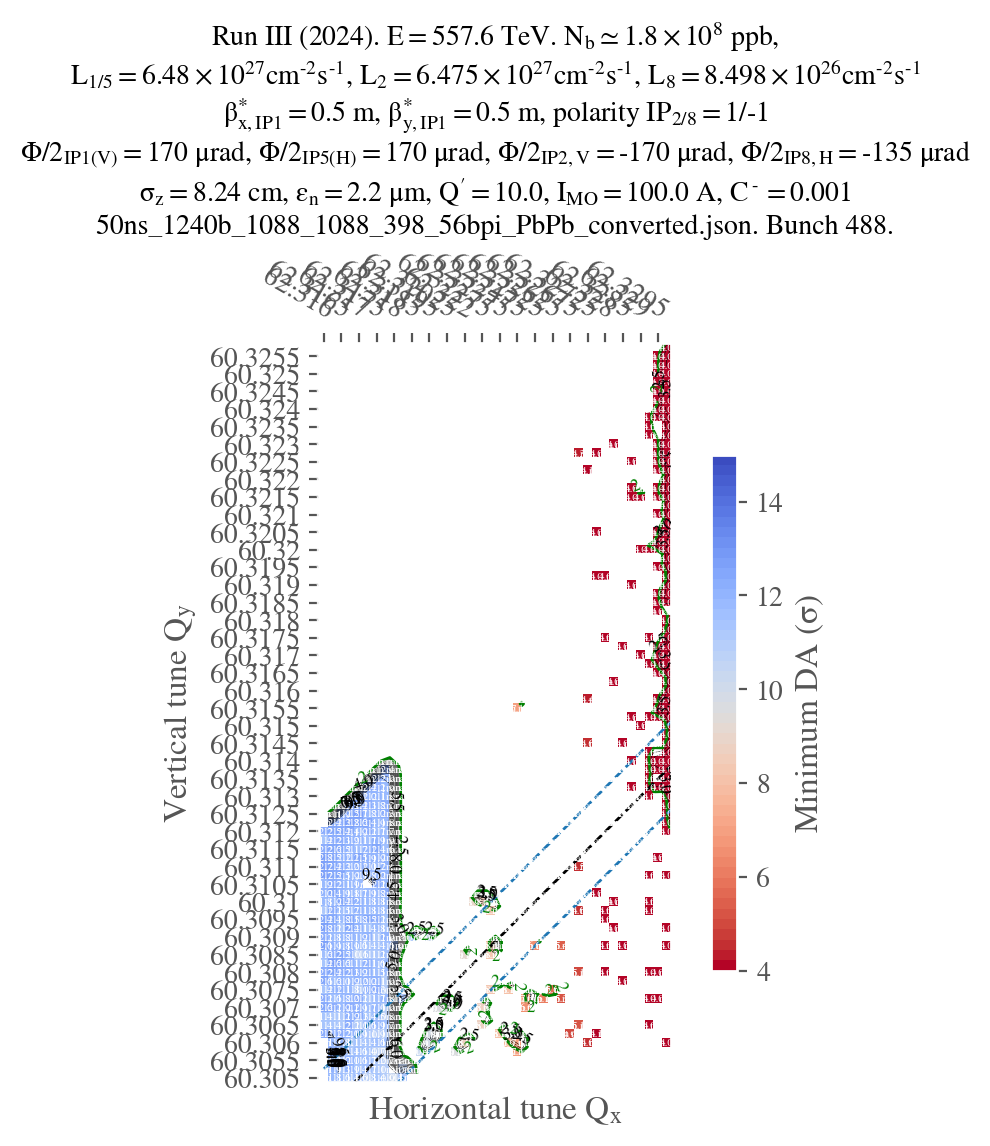

In [4]:

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.5,
    bety=0.5,
    Nb = True,
    green_contour = 2,
    extended_diagonal=False,
    smooth_symmetry = False,
    vmin = 4,
    vmax = 15.,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)